# Data Exploration

In [3]:
import pandas as pd
from zipfile import ZipFile
import os
import numpy as np

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [9]:
data_path = os.path.join(os.getcwd(), '../data')
data_path

'/Users/ladarudnitckaia/Documents/GitHub/telemarketing-optimization/00 data exploration/../data'

## Extract data

In [11]:
with ZipFile(os.path.join(data_path, 'bank+marketing.zip'), 'r') as zip_file: 
    zip_file.extractall(
        path=os.path.join(data_path, 'data_extracted'))

In [12]:
with ZipFile(os.path.join(data_path, 'data_extracted', 'bank.zip'), 'r') as zip_file: 
    zip_file.extractall(
        path=os.path.join(data_path, 'data_extracted'))

In [13]:
with ZipFile(os.path.join(data_path, 'data_extracted', 'bank-additional.zip'), 'r') as zip_file: 
    zip_file.extractall(
        path=os.path.join(data_path, 'data_extracted'))

In [48]:
df = pd.read_csv(os.path.join(data_path, 'data_extracted', 'bank-additional', 'bank-additional-full.csv'), delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Explore data

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [50]:
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [49]:
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['contact'] = df['contact'].astype('category')
df['month'] = df['month'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['y'] = df['y'].astype('category')

In [19]:
len(df[df.duration == 0])

4

In [22]:
print(open(os.path.join(data_path, 'data_extracted', 'bank-additional', 'bank-additional-names.txt'), 'r').read())

Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This 

In [68]:
# are classes balanced?
print('Clients who subscribed a term deposit:',round(len(df[df['y']=="yes"])/len(df)*100,0),'%')
print('Clients who did not subscribe a term deposit:',round(len(df[df['y']=="no"])/len(df)*100,0),'%')

Clients who subscribed a term deposit: 11.0 %
Clients who did not subscribe a term deposit: 89.0 %


In [ ]:
# classes are highly imbalanced. The model might tend to mark more calls as "wasted". 
# sampling method?
# or correct evaluation metric? which one?
# we need to keep as much business as possible -> avoid marking worthy calls as useless
# at the same time reduce the number of useless calls but doing some useless calls is fine

# maybe changing the cost function of a model?
# i.e., each worthy call brings 80 euros and costs 8 euros (+72)
# each useless call costs 8 euros (-8)
# or tweak a threshold?

# try automl to find worthy model
# fine tune only the best one
# and try xgboost because it tends to perform well often

# select one model and make it ready for deployment. e.g., as a REST service?

# explainable AI?

# compare to a baseline: if they call everyone (N) with only C converted.
# profit without a model = -8$*N + 80*C
# profit with a model = -8$*(TP+FP) + 80*TP

In [ ]:
# count missing values

## Test model

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics

In [55]:
from sklearn.preprocessing import LabelEncoder

In [35]:
import xgboost as xgb
from xgboost import plot_importance

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [61]:
df_y = df[['y']]
df_x = df.drop(columns = ['duration', 'y'])

In [62]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df_y)
df_y = label_encoder.transform(df_y)

/Users/ladarudnitckaia/opt/anaconda3/envs/telemarketing-optimization/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ladarudnitckaia/opt/anaconda3/envs/telemarketing-optimization/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [63]:
# stratified sampling by target
tr_val_x, test_x, tr_val_y, test_y = train_test_split(df_x, df_y, test_size = 0.10, random_state = 42, stratify = df_y)
tr_x, val_x, tr_y, val_y = train_test_split(tr_val_x, tr_val_y, test_size = 0.10, random_state = 42, stratify = tr_val_y)

In [64]:
feature_names = list(df_x.columns)

In [65]:
# matrix for XGBoost
dtrain = xgb.DMatrix(tr_x, label=tr_y, feature_names=feature_names, enable_categorical = True)
dtest = xgb.DMatrix(test_x, label=test_y, feature_names=feature_names, enable_categorical = True)
dval = xgb.DMatrix(val_x, label=val_y, feature_names=feature_names, enable_categorical = True)

In [66]:
print('Training Features Shape:', tr_x.shape)
print('Training Labels Shape:', tr_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)
print('Validation Features Shape:', val_x.shape)
print('Validation Labels Shape:', val_y.shape)

Training Features Shape: (33362, 19)
Training Labels Shape: (33362,)
Testing Features Shape: (4119, 19)
Testing Labels Shape: (4119,)
Validation Features Shape: (3707, 19)
Validation Labels Shape: (3707,)


In [ ]:
def f1_eval(predt: np.ndarray, dtrain: xgboost.DMatrix):
    y = dtrain.get_label()
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", metrics.f1_score(y_true=y, y_pred=predt_binary)

In [72]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':"binary:logistic",
    'disable_default_eval_metric': 1,
    'seed': 42,
    'tree_method': 'hist'
}

xgboost_test_model = xgb.train(
    params = params,
    dtrain = dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'dtrain'), (dval, 'dval')],
    #early_stopping_rounds = 10,
    maximize=True)

In [84]:
y_pred = xgboost_test_model.predict(dtest)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

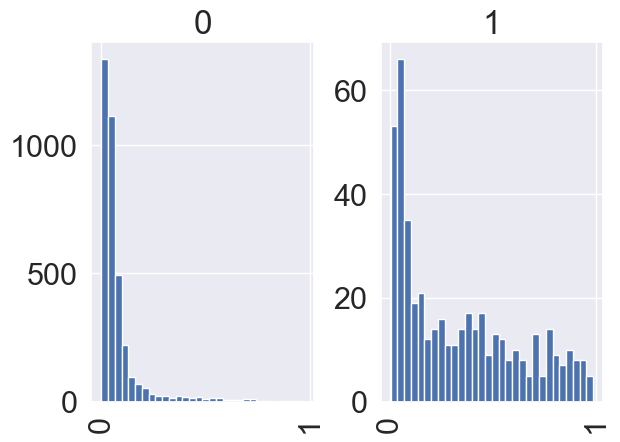

In [92]:
pd.DataFrame({"pred": y_pred, "label": test_y}).hist(column="pred",by="label",bins=30)

In [81]:
xgboost_test_model_pred = np.where(xgboost_test_model.predict(dtest) > 0.1, 1, 0)

In [82]:
print('Performance of xgboost_tuned_weighted, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_test_model_pred),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_test_model_pred),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_test_model_pred),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_test_model_pred),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_test_model_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(dtest.get_label(), xgboost_test_model_pred).transpose())

Performance of xgboost_tuned_weighted, test:
F1: 0.43
Precision: 0.31
Recall: 0.67
AUC: 0.74
Accuracy: 0.8
Confusion matrix:
 [[2974  154]
 [ 681  310]]


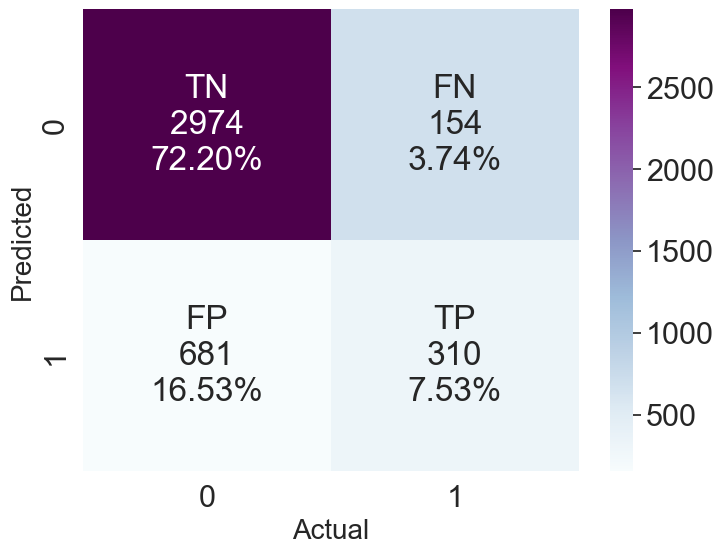

In [83]:
cf_matrix = metrics.confusion_matrix(dtest.get_label(), xgboost_test_model_pred)
TN = cf_matrix[0][0] # correctly predicted useless calls | SAVED 8$ | 0$
FN = cf_matrix[1][0] # worthy calls predicted as useless calls | MINIMIZE TO 0 !!! | OPPORTUNITY COST -72$ 
TP = cf_matrix[1][1] # correctly predicted worthy calls | WIN 72$ | 
FP = cf_matrix[0][1] # useless calls predicted as worthy calls | LOSS -8$ |
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()